In [1]:
"""
1.读取需要的年报列表report_list_need.json
2.根据当前的pdf和txt文件情况，生成状态数据，pdf_status_out
3.读取从上交所和深交所查询的url列表，如果当前状态缺失，保存在pdf_status_with_url.json中，让下载程序进行下载
"""

'\n从新浪财经上下载年报：\n\n优先==》纯html，下载速度快\n缺点==》只有2008年后的数据，并且有的公司还没有，数据不是太全\n'

In [11]:

import json
report_list = {}
with open('report_list_need.json') as f:
    report_list = json.load(f) # {'123456_2001':[pdf,txt,http1,http2,http3]}

In [36]:
# 检查pdf文件和文本状态，把url进行合并

import os
pdf_dir = '../pdf/'
txt_dir = '../txt/'
def getSize(txt_filename):
    fsize=0
    try:
        if os.path.exists(txt_filename):
            fsize = os.path.getsize(txt_filename)
    except Exception as e:
        print('e',e)
    return fsize

for code_year,data in report_list.items():
    code,year = code_year.split('_')
    while len(data)<2:
        data.append(0)
    pdf_file = os.path.join(pdf_dir,year,code_year+'.pdf')
    data[0]=int(getSize(pdf_file)/1024)
    # 大于50M的文件名打印出来
    if data[0]>50*1024:
        print(pdf_file,data[0])
    txt_file = os.path.join(txt_dir,year,code_year+'.txt')
    data[1]=int(getSize(txt_file)/1024)

with open('report_list_status.json','w') as json_file:  
    json.dump(report_list,json_file, sort_keys=True, indent=2)

../pdf/2009/000069_2009.pdf 63244
../pdf/2013/600050_2013.pdf 63469


63469 0


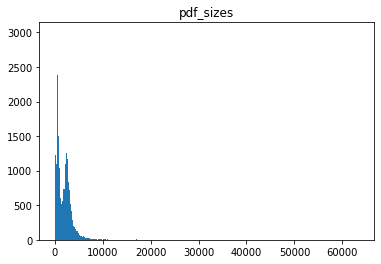

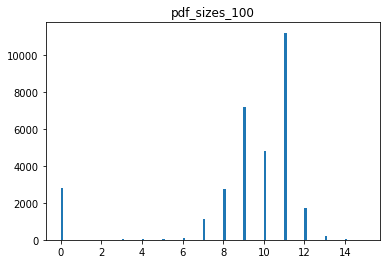

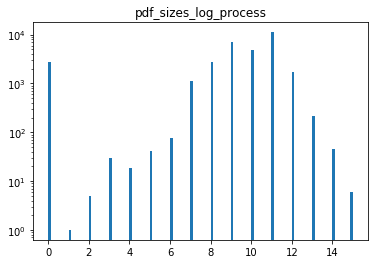

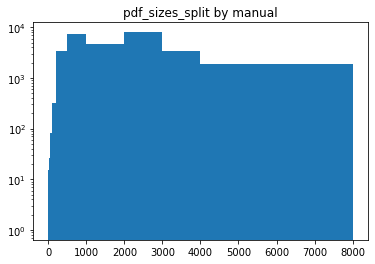

In [43]:
import matplotlib.pyplot as plt
#  matplotlib.axes.Axes.hist() 方法的接口
pdf_sizes = list(map(lambda x:x[0],report_list.values()))
print(max(pdf_sizes),min(pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes, bins='auto')
plt.title('pdf_sizes')
plt.show()

pdf_sizes_100 = list(map(lambda x:int(x/100),pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes_log_process, bins='auto')
plt.title('pdf_sizes_100')
plt.show()

import math
pdf_sizes_log_process = list(map(lambda x:int(math.log(max(x,1),2)),pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes_log_process, bins='auto',log=True)
plt.title('pdf_sizes_log_process')
plt.show()



plt.hist(x=pdf_sizes, bins=[0,1,2,4,10,20,50,100,200,500,1000,2000,3000,4000,8000],log=True)
plt.title('pdf_sizes_split by manual')
plt.show()

In [ ]:
"""
基本处于正态分布状态
0的文件
"""

2059 0


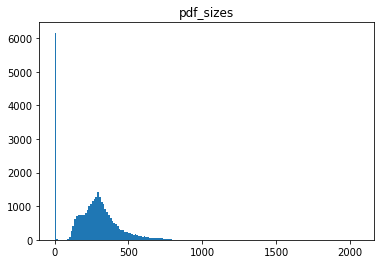

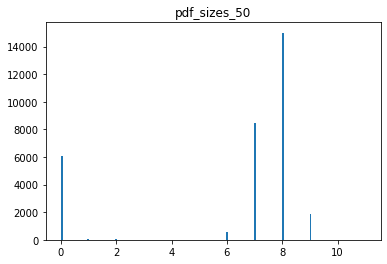

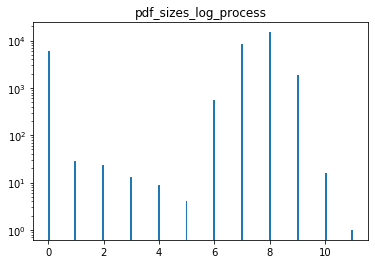

In [48]:
import matplotlib.pyplot as plt
#  matplotlib.axes.Axes.hist() 方法的接口
pdf_sizes = list(map(lambda x:x[1],report_list.values()))
print(max(pdf_sizes),min(pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes, bins='auto')
plt.title('pdf_sizes')
plt.show()

import math
pdf_sizes_50 = list(map(lambda x:int(x/50),pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes_log_process, bins='auto')
plt.title('pdf_sizes_50')
plt.show()

import math
pdf_sizes_log_process = list(map(lambda x:int(math.log(max(x,1),2)),pdf_sizes))
n, bins, patches = plt.hist(x=pdf_sizes_log_process, bins='auto',log=True)
plt.title('pdf_sizes_log_process')
plt.show()

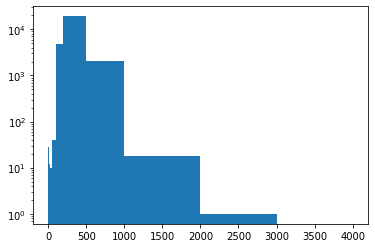

In [35]:
plt.hist(x=pdf_sizes, bins=[0,1,2,4,10,20,50,100,200,500,1000,2000,3000,4000],log=True)
plt.show()

In [49]:
def count_elements(seq) -> dict:
    """Tally elements from `seq`."""
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist
# 按100划分阶梯
pdf_hist = count_elements([int(x[0]/100) for x in report_list.values()])
print("pdf_hist",pdf_hist)
txt_hist = count_elements([int(x[1]/50) for x in report_list.values()])
print("txt_hist",txt_hist)
print('pdf_size_zero=',pdf_hist.get(0))
print('txt_size_zero=',txt_hist.get(0))

pdf_hist {3: 754, 4: 1294, 5: 1784, 12: 445, 11: 497, 15: 372, 47: 90, 22: 822, 37: 214, 35: 281, 10: 654, 2: 1350, 7: 1513, 9: 884, 13: 418, 16: 437, 18: 532, 58: 37, 50: 65, 70: 15, 170: 5, 17: 450, 19: 561, 34: 321, 33: 398, 20: 550, 21: 673, 14: 363, 6: 1930, 23: 928, 27: 795, 29: 635, 24: 951, 8: 1133, 38: 215, 49: 83, 25: 957, 83: 12, 76: 6, 93: 5, 26: 924, 40: 146, 80: 9, 87: 7, 36: 242, 39: 158, 28: 755, 31: 505, 0: 2977, 30: 567, 105: 4, 69: 16, 44: 117, 60: 32, 52: 45, 45: 89, 1: 322, 63: 19, 56: 31, 245: 1, 54: 48, 89: 3, 98: 4, 97: 7, 77: 21, 59: 36, 42: 145, 46: 105, 57: 33, 101: 3, 43: 129, 67: 15, 48: 74, 75: 11, 86: 13, 41: 118, 61: 38, 88: 6, 162: 3, 78: 9, 32: 434, 94: 5, 632: 1, 51: 52, 136: 4, 73: 17, 53: 37, 62: 24, 141: 3, 55: 37, 108: 1, 90: 7, 68: 14, 66: 15, 241: 1, 71: 15, 134: 1, 191: 1, 156: 1, 126: 2, 65: 23, 72: 16, 81: 9, 137: 3, 64: 11, 151: 1, 95: 6, 186: 1, 110: 8, 102: 6, 82: 4, 109: 4, 206: 2, 91: 6, 99: 2, 114: 3, 138: 1, 142: 2, 153: 1, 160: 2, 165

In [51]:

all_pdf_urls = {}
with open('./pdf_urls_sse_szse.json') as f:
    all_pdf_urls = json.load(f)

pdf_urls = {}
url_num = 0
for k,url in all_pdf_urls.items():
    if k in pdf_needs:    
        data = pdf_needs[k]
        url_num +=1
        if url not in data:
            data.append(url)

print('all_pdf_urls=',len(all_pdf_urls.keys()),'ok_url_num=',url_num,'pdf_needs=',len(pdf_needs.keys()))

with open('report_status_with_url.json','w') as json_file:  
    json.dump(pdf_needs,json_file, sort_keys=True, indent=2)

all_pdf_urls= 34916 ok_url_num= 30520 pdf_needs= 32135
